In [61]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


__0 experiment:__

$f(x)=x$

$\hat{f}(x)=a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4 + \dots$

points from uniform distribution from $[-2, 2]$

In [62]:
import autograd.numpy as np_autograd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from autograd import grad
from sklearn.metrics import accuracy_score

In [63]:
def get_mean_l2_norm(size=50, p_count=5, regressor=None, params=None):
    SIZE = size
    P_COUNT = p_count
    
    if regressor is None:
        regressor = LinearRegression
        params = {}
    
    def f(x):
        return x
    def P(x, n):
        return np.power(x, n)
    def d_P(x, n):
        if n == 0:
            return 0
        return n * np.power(x, n - 1)
    def f_model_with_grad(x, coef):
        return np.sum([coef[i] * P(x, i) for i in range(P_COUNT)])
    def f_model_no_grad(x, coef):
        return np.sum([coef[i] * P(x, i) for i in range(P_COUNT)])
    d_f = grad(f)
    
    mean_with_grad = []
    mean_no_grad = []
    for i in range(100):
        points = np.random.uniform(low=-2, high=2, size=SIZE)
        xs = points
        F_with_grad = np.array([f(x) for x in xs] + [d_f(x) for x in xs])
        F_no_grad = np.array([f(x) for x in xs])
        A_with_grad = np.array(
            [[P(x, i) for i in range(P_COUNT)] for x in xs] + [[d_P(x, i) for i in range(P_COUNT)] for x in xs])
        A_no_grad = np.array([[P(x, i) for i in range(P_COUNT)] for x in xs])
        r_with_grad = regressor(**params)
        r_no_grad = regressor(**params)
        r_with_grad.fit(A_with_grad, F_with_grad)
        r_no_grad.fit(A_no_grad, F_no_grad)
        def f_model_with_grad(x):
            return np.sum([r_with_grad.coef_[i] * P(x, i) for i in range(P_COUNT)])

        def f_model_no_grad(x):
            return np.sum([r_no_grad.coef_[i] * P(x, i) for i in range(P_COUNT)])

        test_points = np.random.uniform(low=-2, high=2, size=SIZE)
        test_xs = test_points
        mean_with_grad.append(
            np.linalg.norm(np.array([f(x) for x in test_xs]) - np.array([f_model_with_grad(x) for x in test_xs])))
        mean_no_grad.append(
            np.linalg.norm(np.array([f(x) for x in test_xs]) - np.array([f_model_no_grad(x) for x in test_xs])))
    return np.mean(mean_with_grad), np.mean(mean_no_grad), np.var(mean_with_grad), np.var(mean_no_grad)

In [36]:
experiments = [(2, 1), (2, 2), (5, 2), (50, 4), (50, 5), (50, 20), (50, 50), (200, 5), (200, 50)]
for exp in experiments:
    print('sample size=%d, max order=%d' % exp)
    mean_with_grad, mean_no_grad, var_with_grad, var_no_grad = get_mean_l2_norm(*exp)
    print('\tmean: %f, variance: %f - with gradient\n\tmean: %f, variance: %f - no gradient' % (
        mean_with_grad, var_with_grad, mean_no_grad, var_no_grad))

sample size=2, max order=1
	mean: 2.137829, variance: 1.347496 - with gradient
	mean: 1.502692, variance: 0.359996 - no gradient
sample size=2, max order=2
	mean: 0.000000, variance: 0.000000 - with gradient
	mean: 0.000000, variance: 0.000000 - no gradient
sample size=5, max order=2
	mean: 0.000000, variance: 0.000000 - with gradient
	mean: 0.000000, variance: 0.000000 - no gradient
sample size=50, max order=4
	mean: 0.000000, variance: 0.000000 - with gradient
	mean: 0.000000, variance: 0.000000 - no gradient
sample size=50, max order=5
	mean: 0.000000, variance: 0.000000 - with gradient
	mean: 0.000000, variance: 0.000000 - no gradient
sample size=50, max order=20
	mean: 0.000000, variance: 0.000000 - with gradient
	mean: 0.000000, variance: 0.000000 - no gradient
sample size=50, max order=50
	mean: 57313498.445827, variance: 208601511143908832.000000 - with gradient
	mean: 94260604.188589, variance: 167708659977411552.000000 - no gradient
sample size=200, max order=5
	mean: 0.00000

In [64]:
def plot_l2_mean(polynom_count, sample_size=200, regressor=None, params=None):
    mean_with_grad_res = []
    mean_no_grad_res = []
    var_with_grad_res = []
    var_no_grad_res = []
    p_counts = np.arange(1, polynom_count, 5)
    for p_count in p_counts:
        print(p_count, end=',')
        mean_with_grad, mean_no_grad, var_with_grad, var_no_grad = get_mean_l2_norm(
                                                sample_size, p_count, regressor, params)
        mean_with_grad_res.append(mean_with_grad)
        mean_no_grad_res.append(mean_no_grad)
        var_with_grad_res.append(var_with_grad)
        var_no_grad_res.append(var_no_grad)

    plt.title('Mean norm. Variances are big')
    plt.plot(p_counts, mean_with_grad_res, label='with grad')
    plt.plot(p_counts, mean_no_grad_res, label='no grad')
    plt.xlabel('max polynom degree')
    plt.ylabel('mean l2-norm')
    plt.legend()

1,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,1,6,11,16,21,26,31,36,41,46,

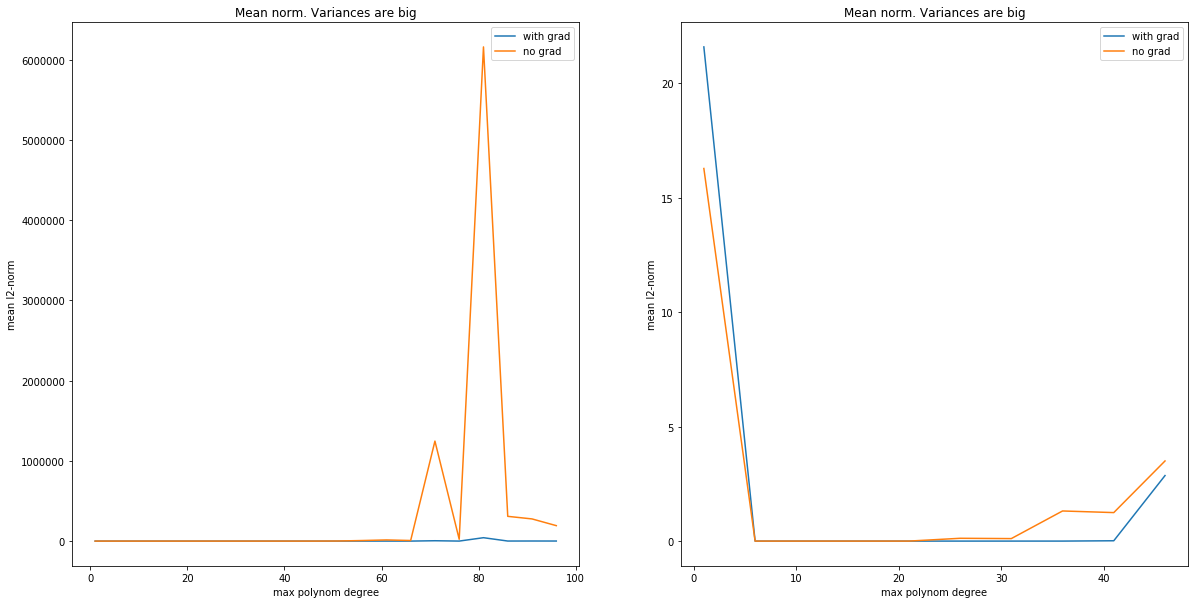

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plot_l2_mean(100)
plt.subplot(1, 2, 2)
plot_l2_mean(50)
plt.show()

__1 experiment:__

$f(x)=sin(x) + cos(x)$

$\hat{f}(x)=a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4 + \dots$

points from uniform distribution from $[-2, 2]$

In [39]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [40]:
import autograd.numpy as np_autograd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from autograd import grad
from sklearn.metrics import accuracy_score

In [43]:
def get_mean_l2_norm(size=50, p_count=5, regressor=None, params=None):
    SIZE = size
    P_COUNT = p_count
    
    if regressor is None:
        regressor = LinearRegression
        params = {}
    
    def f(x):
        return np_autograd.sin(x) + np_autograd.cos(x)
    def P(x, n):
        return np.power(x, n)
    def d_P(x, n):
        if n == 0:
            return 0
        return n * np.power(x, n - 1)
    def f_model_with_grad(x, coef):
        return np.sum([coef[i] * P(x, i) for i in range(P_COUNT)])
    def f_model_no_grad(x, coef):
        return np.sum([coef[i] * P(x, i) for i in range(P_COUNT)])
    d_f = grad(f)
    
    mean_with_grad = []
    mean_no_grad = []
    for i in range(100):
        points = np.random.uniform(low=-2, high=2, size=SIZE)
        xs = points
        F_with_grad = np.array([f(x) for x in xs] + [d_f(x) for x in xs])
        F_no_grad = np.array([f(x) for x in xs])
        A_with_grad = np.array(
            [[P(x, i) for i in range(P_COUNT)] for x in xs] + [[d_P(x, i) for i in range(P_COUNT)] for x in xs])
        A_no_grad = np.array([[P(x, i) for i in range(P_COUNT)] for x in xs])
        r_with_grad = regressor(**params)
        r_no_grad = regressor(**params)
        r_with_grad.fit(A_with_grad, F_with_grad)
        r_no_grad.fit(A_no_grad, F_no_grad)
        def f_model_with_grad(x):
            return np.sum([r_with_grad.coef_[i] * P(x, i) for i in range(P_COUNT)])

        def f_model_no_grad(x):
            return np.sum([r_no_grad.coef_[i] * P(x, i) for i in range(P_COUNT)])

        test_points = np.random.uniform(low=-2, high=2, size=SIZE)
        test_xs = test_points
        mean_with_grad.append(
            np.linalg.norm(np.array([f(x) for x in test_xs]) - np.array([f_model_with_grad(x) for x in test_xs])))
        mean_no_grad.append(
            np.linalg.norm(np.array([f(x) for x in test_xs]) - np.array([f_model_no_grad(x) for x in test_xs])))
    return np.mean(mean_with_grad), np.mean(mean_no_grad), np.var(mean_with_grad), np.var(mean_no_grad)

In [44]:
experiments = [(2, 1), (2, 2), (5, 2), (50, 4), (50, 5), (50, 20), (50, 50), (200, 5), (200, 50)]
for exp in experiments:
    print('sample size=%d, max order=%d' % exp)
    mean_with_grad, mean_no_grad, var_with_grad, var_no_grad = get_mean_l2_norm(*exp)
    print('\tmean: %f, variance: %f - with gradient\n\tmean: %f, variance: %f - no gradient' % (
        mean_with_grad, var_with_grad, mean_no_grad, var_no_grad))

sample size=2, max order=1
	mean: 1.868926, variance: 1.002978 - with gradient
	mean: 1.333545, variance: 0.125417 - no gradient
sample size=2, max order=2
	mean: 1.068243, variance: 1.080266 - with gradient
	mean: 1.238612, variance: 0.227668 - no gradient
sample size=5, max order=2
	mean: 1.611753, variance: 0.774224 - with gradient
	mean: 1.638599, variance: 0.191493 - no gradient
sample size=50, max order=4
	mean: 0.476635, variance: 0.007870 - with gradient
	mean: 6.754437, variance: 0.009712 - no gradient
sample size=50, max order=5
	mean: 0.105886, variance: 0.000360 - with gradient
	mean: 7.059941, variance: 0.000372 - no gradient
sample size=50, max order=20
	mean: 0.000000, variance: 0.000000 - with gradient
	mean: 7.071068, variance: 0.000000 - no gradient
sample size=50, max order=50
	mean: 2051775.140489, variance: 87398231669411.296875 - with gradient
	mean: 73117106.537265, variance: 96662521172947776.000000 - no gradient
sample size=200, max order=5
	mean: 0.190788, var

In [45]:
def plot_l2_mean(polynom_count, sample_size=200, regressor=None, params=None):
    mean_with_grad_res = []
    mean_no_grad_res = []
    var_with_grad_res = []
    var_no_grad_res = []
    p_counts = np.arange(1, polynom_count, 5)
    for p_count in p_counts:
        print(p_count, end=',')
        mean_with_grad, mean_no_grad, var_with_grad, var_no_grad = get_mean_l2_norm(
                                                sample_size, p_count, regressor, params)
        mean_with_grad_res.append(mean_with_grad)
        mean_no_grad_res.append(mean_no_grad)
        var_with_grad_res.append(var_with_grad)
        var_no_grad_res.append(var_no_grad)

    plt.title('Mean norm. Variances are big')
    plt.plot(p_counts, mean_with_grad_res, label='with grad')
    plt.plot(p_counts, mean_no_grad_res, label='no grad')
    plt.xlabel('max polynom degree')
    plt.ylabel('mean l2-norm')
    plt.legend()

1,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96,1,6,11,16,21,26,31,36,41,46,

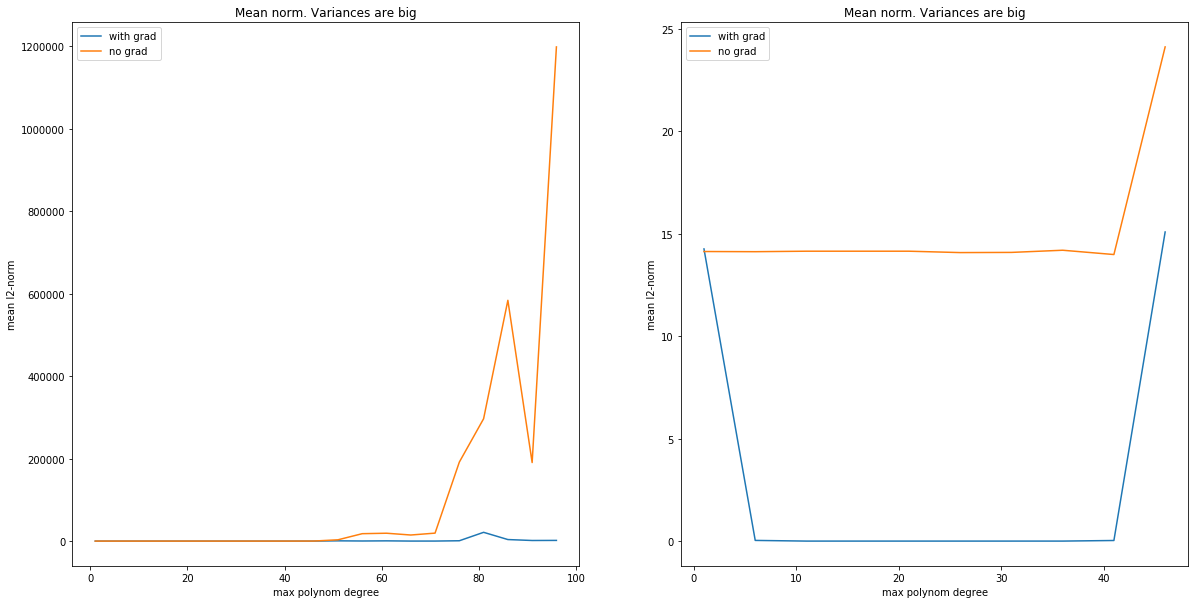

In [46]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plot_l2_mean(100)
plt.subplot(1, 2, 2)
plot_l2_mean(50)
plt.show()

__2 experiment:__

$f(x)=exp(-x_1^2 - 0.5(x_2 - 1)x_2)$

$\hat{f}(x)$ - linear combination of Chebyshev polynomials/their miltiplication

points from uniform distribution from $[-2, 2] \times [-2, 2]$

In [52]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [53]:
import autograd.numpy as np_autograd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from autograd import grad
from sklearn.metrics import accuracy_score

In [54]:
def f(x1, x2):
    return np_autograd.exp(-np_autograd.power(x1, 2) - 0.5 * (x2 - 1) * x2)

def d_f1(x1, x2):
    return np_autograd.exp(-np_autograd.power(x1, 2) - 0.5 * (x2 - 1) * x2) * (-2*x1)

def d_f2(x1, x2):
    return np_autograd.exp(-np_autograd.power(x1, 2) - 0.5 * (x2 - 1) * x2) * (-x2 + 0.5)

def P(x, n):
    if n == 0:
        return 1
    if n == 1:
        return x
    return 2 * x * P(x, n - 1) - P(x, n - 2)

def d_P(x, n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return 2 * x * d_P(x, n - 1) + 2 * P(x, n - 1) - d_P(x, n - 2)

In [55]:
def build_P_polynoms():
    P_polynoms = []
    for deg in range(20):
        P_polynoms.append(lambda x1, x2: P(x1, deg))
        P_polynoms.append(lambda x1, x2: P(x2, deg))
        
        for first_monom_deg in range(1, (deg + 1) // 2):
            P_polynoms.append(lambda x1, x2: P(x1, first_monom_deg) * P(x2, deg - first_monom_deg))
            if first_monom_deg * 2 != deg:
                P_polynoms.append(lambda x1, x2: P(x1, deg - first_monom_deg) * P(x2, first_monom_deg))
    return P_polynoms

def build_d1_P_polynoms():
    P_polynoms = []
    for deg in range(20):
        P_polynoms.append(lambda x1, x2: d_P(x1, deg))
        P_polynoms.append(lambda x1, x2: 0)
        
        for first_monom_deg in range(1, (deg + 1) // 2):
            P_polynoms.append(lambda x1, x2: d_P(x1, first_monom_deg) * P(x2, deg - first_monom_deg))
            if first_monom_deg * 2 != deg:
                P_polynoms.append(lambda x1, x2: d_P(x1, deg - first_monom_deg) * P(x2, first_monom_deg))
    return P_polynoms

def build_d2_P_polynoms():
    P_polynoms = []
    for deg in range(20):
        P_polynoms.append(lambda x1, x2: 0)
        P_polynoms.append(lambda x1, x2: d_P(x2, deg))
        
        for first_monom_deg in range(1, (deg + 1) // 2):
            P_polynoms.append(lambda x1, x2: P(x1, first_monom_deg) * d_P(x2, deg - first_monom_deg))
            if first_monom_deg * 2 != deg:
                P_polynoms.append(lambda x1, x2: P(x1, deg - first_monom_deg) * d_P(x2, first_monom_deg))
    return P_polynoms

In [56]:
P_polynoms = build_P_polynoms()
d1_P_polynoms = build_d1_P_polynoms()
d2_P_polynoms = build_d2_P_polynoms()

In [59]:
def get_mean_l2_norm(size=50, p_count=5):
    SIZE = size
    P_COUNT = p_count
    
    mean_with_grad = []
    mean_no_grad = []
    for i in range(3):
        points = np.random.uniform(low=(-2, -2), high=(2, 2), size=(SIZE, 2))
        x1s = points[:,0]
        x2s = points[:,1]
        F_with_grad = np.array(
            [f(p[0], p[1]) for p in points] + \
            [d_f1(p[0], p[1]) for p in points] + \
            [d_f2(p[0], p[1]) for p in points])
        F_no_grad = np.array([f(p[0], p[1]) for p in points])
        A_with_grad = np.array(
            [[P_polynoms[i](p[0], p[1]) for i in range(P_COUNT)] for p in points] + \
            [[d1_P_polynoms[i](p[0], p[1]) for i in range(P_COUNT)] for p in points] + \
            [[d2_P_polynoms[i](p[0], p[1]) for i in range(P_COUNT)] for p in points])
        A_no_grad = np.array([[P_polynoms[i](p[0], p[1]) for i in range(P_COUNT)] for p in points])
        r_with_grad = LinearRegression()
        r_no_grad = LinearRegression()
        r_with_grad.fit(A_with_grad, F_with_grad)
        r_no_grad.fit(A_no_grad, F_no_grad)
        def f_model_with_grad(x1, x2):
            return np.sum([r_with_grad.coef_[i] * P_polynoms[i](x1, x2) for i in range(P_COUNT)])

        def f_model_no_grad(x1, x2):
            return np.sum([r_no_grad.coef_[i] * P_polynoms[i](x1, x2) for i in range(P_COUNT)])

        test_points = np.random.uniform(low=(-2, -2), high=(2, 2), size=(SIZE, 2))
        test_x1s = points[:,0]
        test_x2s = points[:,1]
        mean_with_grad.append(
            np.linalg.norm(np.array([f(p[0], p[1]) for p in test_points]) - np.array([f_model_with_grad(p[0], p[1]) for p in test_points])))
        mean_no_grad.append(
            np.linalg.norm(np.array([f(p[0], p[1]) for p in test_points]) - np.array([f_model_no_grad(p[0], p[1]) for p in test_points])))
        
    return np.mean(mean_with_grad), np.mean(mean_no_grad), np.var(mean_with_grad), np.var(mean_no_grad)

In [58]:
get_mean_l2_norm(size=50, p_count=5)

(2.839512407525316,
 2.8823374182838077,
 0.0517211462176941,
 0.04309375523293566)

1,6,11,16,21,26,31,36,

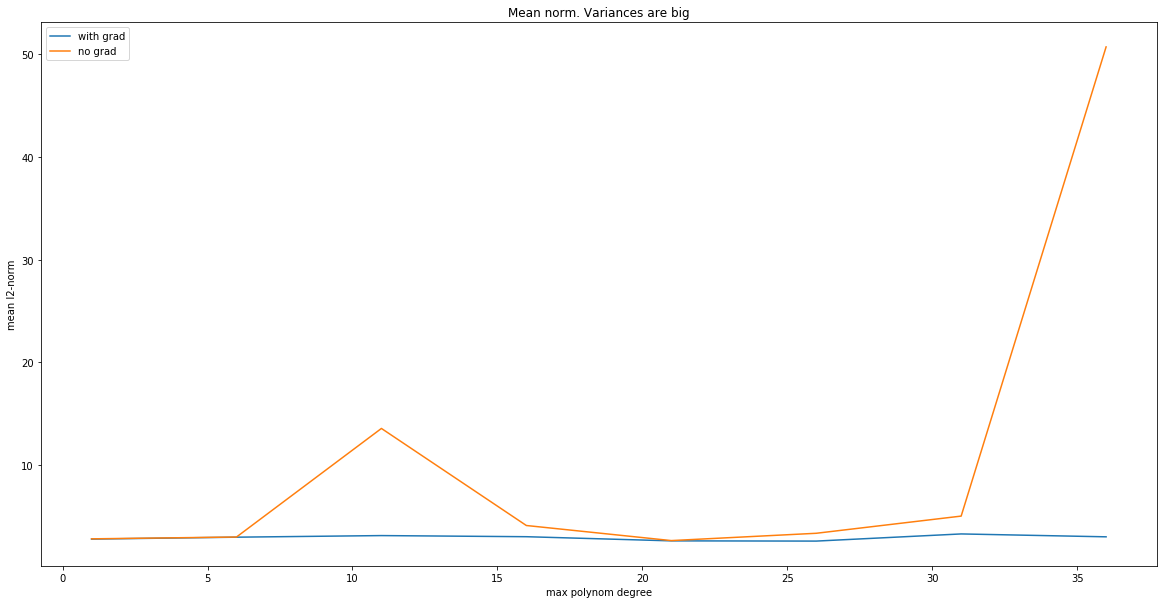

In [60]:
plt.figure(figsize=(20,10))
sample_size = 50
mean_with_grad_res = []
mean_no_grad_res = []
var_with_grad_res = []
var_no_grad_res = []
p_counts = np.arange(1, 40, 5)
for p_count in p_counts:
    print(p_count, end=',')
    mean_with_grad, mean_no_grad, var_with_grad, var_no_grad = get_mean_l2_norm(sample_size, p_count)
    mean_with_grad_res.append(mean_with_grad)
    mean_no_grad_res.append(mean_no_grad)
    var_with_grad_res.append(var_with_grad)
    var_no_grad_res.append(var_no_grad)

plt.title('Mean norm. Variances are big')
plt.plot(p_counts, mean_with_grad_res, label='with grad')
plt.plot(p_counts, mean_no_grad_res, label='no grad')
plt.xlabel('max polynom degree')
plt.ylabel('mean l2-norm')
plt.legend()
plt.show()